In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
file_path = '/Volumes/mo/maiz/census.txt'

In [3]:
sc_gen_af = np.loadtxt(file_path, usecols=(1, 2, 3))

In [4]:
sc_gen_af.shape

(32758, 3)

In [5]:
print("sc", sc_gen_af[:, 0].min(), "-", sc_gen_af[:, 0].max(), "gen", sc_gen_af[:, 1].min(), "-", sc_gen_af[:, 1].max(), "af", sc_gen_af[:, 2].min(), "-", sc_gen_af[:, 2].max())

sc 0.100002 - 0.999981 gen 2200.0 - 2480.0 af 0.000358194 - 1.0


In [9]:
min_af = 0.2
max_af = 0.9

mask = np.logical_and(sc_gen_af[:, 2] > min_af, sc_gen_af[:, 2] < max_af)

In [ ]:
np.sum(mask)

In [6]:
sc_range = np.linspace(0.1, 1)

In [ ]:
#mask = np.logical_not(mask)
gen = sc_gen_af[mask, 1]
sc = sc_gen_af[mask, 0]
AF = sc_gen_af[mask, 2]

In [7]:
gen = sc_gen_af[:, 1]
sc = sc_gen_af[:, 0]
AF = sc_gen_af[:, 2]

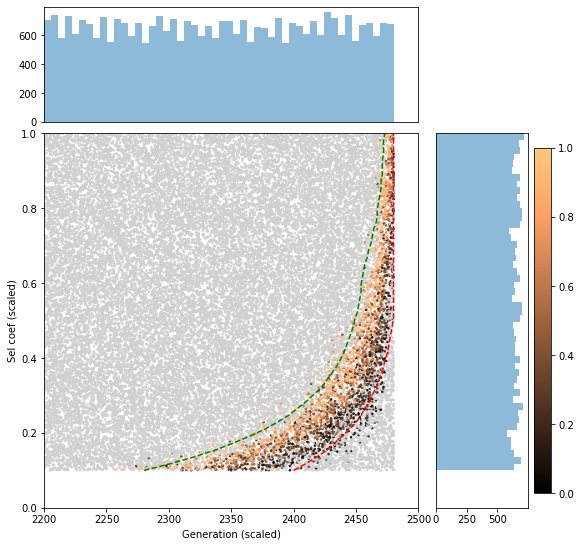

In [14]:
# set colormap
af_cmap = cm.get_cmap(name="copper")
# af_cmap.set_over(color="#FFFFFF")
# af_cmap.set_under(color="#FFFFFF")
af_cmap.set_over(color="#D0D0D0", alpha=0.3)
af_cmap.set_under(color="#D0D0D0", alpha=0.3)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h+0.01, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
#axHistx.xaxis.set_major_formatter(nullfmt)
#axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(gen, sc, c=AF, s=3, cmap=af_cmap, vmin=min_af, vmax=max_af, alpha=0.8) # change vmin, vmax!!
#axScatter.axvline(x=2480, ymin=0.1, ymax=1, c='lightblue', ls='-')
early_gen = np.around(np.maximum(2475 - 500*np.exp(-6*(sc_range-0.1)), 2460 - 180*np.exp(-7*(sc_range-0.1))))
axScatter.plot(early_gen, sc_range, "g--") # Early generation fit
late_gen = np.clip(np.around(2485 - 85*np.exp(-6.8*(sc_range-0.1))), a_min=2200, a_max=2480)
axScatter.plot(late_gen, sc_range, "r--") # Late generation fit

axScatter.set_xlim((2200, 2500))
axScatter.set_ylim((0, 1))
axScatter.set_xlabel("Generation (scaled)")
axScatter.set_ylabel("Sel coef (scaled)")
#axScatter.set_yscale("log")

bins = 50
# axHistx.hist([x[~cat], x[cat]], alpha=0.5, bins=bins, color=[neg_color, pos_color], stacked=True)
axHistx.hist(gen, alpha=0.5, bins=bins)


# axHisty.hist([y[~cat], y[cat]], alpha=0.5, bins=bins, orientation='horizontal', color=[neg_color, pos_color], stacked=True)
axHisty.hist(sc, alpha=0.5, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())
# axHisty.set_xlim((0, 500))
axHistx.set_xticks([])
axHisty.set_yticks([])

plt.colorbar(cm.ScalarMappable(cmap=af_cmap))
plt.savefig(file_path+"_distr.pdf")
plt.show()